# Limpieza de bienes raíces

Este es un conjunto de datos (dataset) reales que fue descargado usando técnicas de web scraping. La data contiene registros de **Fotocasa**, el cual es uno de los sitios más populares de bienes raíces en España. Por favor no hagas esto (web scraping) a no ser que sea para propósitos académicos.

El dataset fue descargado hace algunos años por Henry Navarro y en ningún caso se obtuvo beneficio económico de ello.

Contiene miles de datos de casas reales publicadas en la web www.fotocasa.com. Tu objetivo es extraer tanta información como sea posible con el conocimiento que tienes hasta ahora de ciencia de datos, por ejemplo ¿cuál es la casa más cara en todo el dataset?

Empecemos precisamente con esa pregunta... ¡Buena suerte!

#### Ejercicio 00. Lee el dataset assets/real_estate.csv e intenta visualizar la tabla (★☆☆)

In [4]:
import pandas as pd

# Este archivo CSV contiene puntos y comas en lugar de comas como separadores
#pd.set_option('display.max_columns', None)
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


#### Ejercicio 01. ¿Cuál es la casa más cara en todo el dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle del Prado, Nº20 es la más cara y su precio es de 5000000 USD`

In [2]:
# TODO
import pandas as pd

df = pd.read_csv('assets/real_estate.csv', sep=';')
max_price_index = df['price'].idxmax()
casa_mas_cara = df.loc[max_price_index]
precio = casa_mas_cara['price']
direccion = casa_mas_cara['address']
print(f'La casa con dirección en {direccion}, es la más cara y su precio es de {precio} USD')


La casa con dirección en El Escorial, es la más cara y su precio es de 8500000 USD


#### Ejercicio 02. ¿Cuál es la casa más barata del dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle Alcalá, Nº58 es la más barata y su precio es de 12000 USD`

In [71]:
# TODO
import pandas as pd

#Leer archivo
df = pd.read_csv('assets/real_estate.csv', sep=';')

#Filtrar para que la casa no pueda valer 0
df_filtrado = df[df['price'] > 0]

#Definir el indice de la casa con menor precio
min_price_index = df_filtrado['price'].idxmin()

casa_mas_barata = df_filtrado.loc[min_price_index]

precio = casa_mas_barata['price']

direccion = casa_mas_barata['address']

print(f'La casa con dirección en {direccion}, es la más barata y su precio es de {precio} USD')

La casa con dirección en Berlin, Coslada, es la más barata y su precio es de 600 USD


#### Ejercicio 03. ¿Cuál es la casa más grande y la más pequeña del dataset? (★☆☆)

Imprime la dirección y el área de las casas seleccionadas. Por ejemplo:

`La casa más grande está ubicada en Calle Gran Vía, Nº38 y su superficie es de 5000 metros`

`La casa más pequeña está ubicada en Calle Mayor, Nº12 y su superficie es de 200 metros`

In [13]:
# TODO
import pandas as pd

#CASA MAS GRANDE
df = pd.read_csv('assets/real_estate.csv', sep=';')
index_casa_mas_grande = df['surface'].idxmax()
casa_mas_grande = df.loc[index_casa_mas_grande]

print(f"La casa mas grande esta ubicada en {casa_mas_grande['address']}, y su superficie es de {casa_mas_grande['surface']} metros")

#CASA MAS PEQUENA
df = pd.read_csv('assets/real_estate.csv', sep=';')
index_casa_mas_pequena = df['surface'].idxmin()
casa_mas_pequena = df.loc[index_casa_mas_pequena]

print(f"La casa mas grande esta ubicada en {casa_mas_pequena['address']}, y su superficie es de {casa_mas_pequena['surface']} metros")


La casa mas grande esta ubicada en Sevilla la Nueva, y su superficie es de 249000.0 metros
La casa mas grande esta ubicada en Calle Amparo,  Madrid Capital, y su superficie es de 15.0 metros


#### Ejercicio 04. ¿Cuantas poblaciones (columna level5) contiene el dataset? (★☆☆)

Imprime el nombre de las poblaciones separadas por coma. Por ejemplo:

`> print(populations)`

`population1, population2, population3, ...`

In [74]:
# TODO

import pandas as pd

#Leer archivo
df = pd.read_csv('assets/real_estate.csv', sep=';')

#Poblaciones unicas
poblaciones = df['level5'].unique()

#Cantidad y nombres
print(len(poblaciones))
print(', '.join(poblaciones))

168
Arganda del Rey, Fuenlabrada, Boadilla del Monte, Las Rozas de Madrid,  Madrid Capital, Villaviciosa de Odón, Pinto, Valdemoro, Navalcarnero, Pozuelo de Alarcón, Torrejón de Ardoz, Navalagamella, San Sebastián de los Reyes, Rivas-vaciamadrid, Alpedrete, Móstoles, San Fernando de Henares, Coslada, Becerril de la Sierra, Alcalá de Henares, Chinchón, Parla, Alcorcón, El Escorial, Leganés, Pedrezuela, Majadahonda, Villanueva de la Cañada, Villanueva del Pardillo, Torrelodones, Moralzarzal, Mejorada del Campo, Aranjuez, Corpa, Getafe, Velilla de San Antonio, Sevilla la Nueva, San Martín de la Vega, Villalbilla, Collado Villalba, Alcobendas, El Molar (Madrid), Moraleja de Enmedio, Algete, Campo Real, Torrejón de la Calzada, Colmenar Viejo, Valdemorillo, Fuente El Saz de Jarama, Tres Cantos, Arroyomolinos (Madrid), Griñón, Paracuellos de Jarama, Guadarrama, Titulcia, Galapagar, Collado Mediano, Los Molinos, San Lorenzo de El Escorial, Loeches, San Martín de Valdeiglesias, Navas del Rey, B

#### Ejercicio 05. ¿El dataset contiene valores no admitidos (NAs)? (★☆☆)

Imprima un booleano (`True` o `False`) seguido de la fila/columna que contiene el NAs.

In [9]:
# TODO

import pandas as pd

df = pd.read_csv('assets/real_estate.csv', sep=';')

missing_data = df.isna()
print(missing_data)

#Lo que puedo ver es que en zipCode y en customZone todos los valores son NAs

       Unnamed: 0  id_realEstates  isNew  realEstate_name  phone_realEstate  \
0           False           False  False            False             False   
1           False           False  False            False             False   
2           False           False  False            False             False   
3           False           False  False            False             False   
4           False           False  False            False             False   
...           ...             ...    ...              ...               ...   
15330       False           False  False            False             False   
15331       False           False  False            False             False   
15332       False           False  False            False             False   
15333       False           False  False            False             False   
15334       False           False  False            False             False   

       url_inmueble  rooms  bathrooms  surface  pri

#### Ejercicio 06. Elimina los NAs del dataset, si aplica (★★☆)

Imprima una comparación entre las dimensiones del DataFrame original versus el DataFrame después de las eliminaciones.


In [79]:
# TODO
import pandas as pd

#Leer archivo
df = pd.read_csv('assets/real_estate.csv', sep=';')

#Dimensiones originales del DF
dimesiones_originales = df.shape
print(f'Dimesiones del Dataframe original: filas {dimesiones_originales[0]}, columnas {dimesiones_originales[1]}')

#Dimensiones depues de eliminar todas las filas con NaN
df_datos_eliminados = df.dropna()
dimensiones_datos_eliminados = df_datos_eliminados.shape
print(f'Dimesiones del Dataframe sin NAs: filas {dimensiones_datos_eliminados[0]}, columnas {dimensiones_datos_eliminados[1]}')

#Dimensiones eliminando las ultimas dos columnas que solo continen NaN
df_sin_dos_columnas = df.drop(['zipCode','customZone'], axis=1)
df_datos_eliminados_sin_ultimas_columnas = df_sin_dos_columnas.shape
print(f'Dimesiones del Dataframe sin zipCode & customZone: filas {df_datos_eliminados_sin_ultimas_columnas[0]}, columnas {df_datos_eliminados_sin_ultimas_columnas[1]}')



Dimesiones del Dataframe original: filas 15335, columnas 37
Dimesiones del Dataframe sin NAs: filas 0, columnas 37
Dimesiones del Dataframe sin zipCode & customZone: filas 15335, columnas 35


#### Ejercicio 07. ¿Cuál la media de precios en la población (columna level5) de "Arroyomolinos (Madrid)"? (★★☆)

Imprima el valor obtenido.

In [15]:
# TODO
import pandas as pd

df = pd.read_csv('assets/real_estate.csv', sep=';')

arroyomolinos_df = df[df['level5'] == "Arroyomolinos (Madrid)"]

media_precio = arroyomolinos_df['price'].mean().round(2)

print(media_precio)

294541.6


#### Ejercicio 08. Trazar el histograma de los precios para la población (level5 column) de "Arroyomolinos (Madrid)" y explica qué observas (★★☆)

Imprime el histograma de los precios y escribe en la celda del Markdown un breve análisis del trazado.


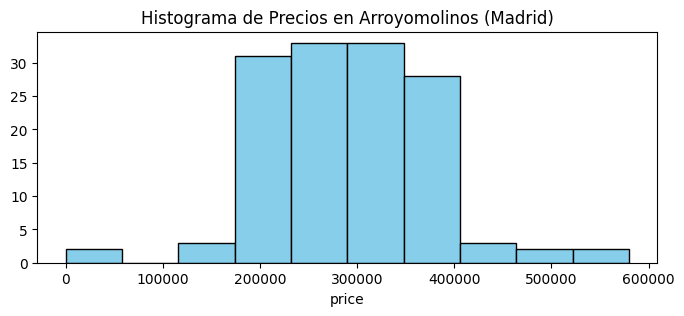

In [32]:
# TODO: Code

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('assets/real_estate.csv', sep=';')

arroyomolinos_df = df[df['level5'] == "Arroyomolinos (Madrid)"]

plt.figure(figsize=(8, 3))
plt.hist(arroyomolinos_df['price'], color='skyblue', edgecolor='black')
plt.title('Histograma de Precios en Arroyomolinos (Madrid)')
plt.xlabel('price')
plt.show()

**TODO: Markdown**. Lo que mas podemos ver es que entre el rando de los 200.000 y los 400.000 podriamos conseguir una mayor cantidad de oportunidades de inversion. Sin embargo, siguen habiendo ciertas oportunidades de inversion a un precio mas bajo que la media del mercado lo que podria traer beneficios

#### Ejercicio 09. ¿Son los precios promedios de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios y escribe una conclusión sobre ellos.

In [18]:
# TODO
import pandas as pd

df = pd.read_csv('assets/real_estate.csv', sep=';')

valdemorillo_df = df[df['level5'] == "Valdemorillo"]
galapagar_df = df[df['level5'] == "Galapagar"]

promedio_valdemorillo = int(valdemorillo_df['price'].mean())
promedio_galapagar = int(galapagar_df['price'].mean())

print('Promedio de los precio en Valdemorillo\n', promedio_valdemorillo)
print('Promedio de los precio en Galapar\n', promedio_galapagar)

Promedio de los precio en Valdemorillo
 363860
Promedio de los precio en Galapar
 360063


***CONCLUSION:*** el promedio de precios de ambos lugares estan en el rango de los 360.000, sin embargo, no son los mismos Esto solo significa que en estas dos ciudades los precios son muy parecidos


#### Ejercicio 10. ¿Son los promedios de precio por metro cuadrado (precio/m2) de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios de precio por metro cuadrado y escribe una conclusión sobre ellos.

Pista: Crea una nueva columna llamada `pps` (*price per square* o precio por metro cuadrado) y luego analiza los valores.

In [13]:
# TODO

import pandas as pd

df = pd.read_csv('assets/real_estate.csv', sep=';')

#NUEVA COLUMNA
df['pps'] = df['price'] / df['surface']

#SEPARA INFORMACION
valdemorillo_df = df[df['level5'] == "Valdemorillo"]
galapagar_df = df[df['level5'] == "Galapagar"]

#PRECIO MEDIO POR METRO CUADRADO
mean_price_valdemorillo = valdemorillo_df['pps'].mean().round()
mean_price_galapagar = galapagar_df['pps'].mean().round()

#TEST
print(f"Precio por metro cuadrado en Valdemorillo: £{mean_price_valdemorillo}")
print(f"Precio por metro cuadrado en Galapagar: £{mean_price_galapagar}")


Precio por metro cuadrado en Valdemorillo: £1318.0
Precio por metro cuadrado en Galapagar: £1606.0

Como podemos ver, los precios no son los mismos. Esto se debe a que la media del precio y la media de los metros cuadrados son diferentes en ambas ciudades


***CONCLUSION:*** Como podemos ver, los precios no son los mismos. Esto se debe a que la media del precio y la media de los metros cuadrados son diferentes en ambas ciudades


#### Ejercicio 11. Analiza la relación entre la superficie y el precio de las casas. (★★☆)

Pista: Puedes hacer un `scatter plot` y luego escribir una conclusión al respecto.

/tmp/ipykernel_636/284479435.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


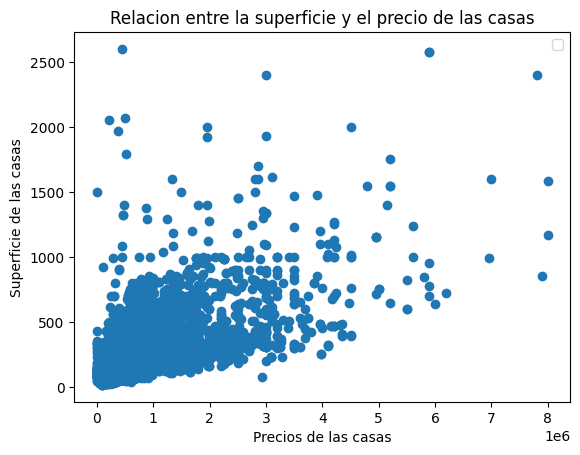

In [16]:
# TODO: Código
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('assets/real_estate.csv', sep=';')

new_df = df[df['surface'] < 3000]

#CREANDO EL GRAFICO
plt.scatter(new_df['price'].dropna() ,new_df['surface'].dropna())

#CREANDO LAS ETIQUETAS
plt.xlabel('Precios de las casas')
plt.ylabel('Superficie de las casas')
plt.title('Relacion entre la superficie y el precio de las casas')

#MOSTRAR
plt.show()


***CONCLUSION:*** Al hacer un filtro para separar los valores extremos de la superificie, podemos notar que la relación no es completamente lineal. Ciertamente hay una ligera tendencia a que a medida que aumenta el precio, también aumenta la superficie. Sin embargo, también se ven casas con superficies grandes pero con precios bajos, y viceversa

#### Ejercicio 12. ¿Cuántas agencia de bienes raíces contiene el dataset? (★★☆)

Imprime el valor obtenido.

In [14]:
# TODO
import pandas as pd

df = pd.read_csv('assets/real_estate.csv', sep=';')

unique_agency = df['realEstate_name'].nunique()

print(unique_agency)


1821


#### Ejercicio 13. ¿Cuál es la población (columna level5) que contiene la mayor cantidad de casas?(★★☆)

Imprima la población y el número de casas.

In [81]:
# TODO
import pandas as pd

df = pd.read_csv('assets/real_estate.csv', sep=';')

#CONTAR CADA UNA DE LAS CIUDADES
conteo_ciudades = df['level5'].value_counts()
#AGARRAR LA CIUDAD QUE SALIO MAS ALTA EN EL CONTEO
ciudad_mas_frecuente = conteo_ciudades.idxmax()
#ALMACENAR CUANTAS VECES SE CONTO
veces_contadas = conteo_ciudades.max()
#TEST
print(f'La poblacion de{ciudad_mas_frecuente} contienen un numero total de {veces_contadas} casas')

La poblacion de Madrid Capital contienen un numero total de 6643 casas


#### Ejercicio 14. Ahora vamos a trabajar con el "cinturón sur" de Madrid. Haz un subconjunto del DataFrame original que contenga las siguientes poblaciones (columna level5): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Pista: Filtra el DataFrame original usando la columna `level5` y la función `isin`.

In [25]:
# TODO
import pandas as pd

df = pd.read_csv('assets/real_estate.csv', sep=';')

cinturon_sur = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]

subconjunto = df[df['level5'].isin(cinturon_sur)]

print(subconjunto)

       Unnamed: 0  id_realEstates  isNew  \
1               2       153867863  False   
3               4       152776331  False   
85             86       153152077  False   
94             95       153995577  False   
109           110       153586414  False   
...           ...             ...    ...   
15275       15276       153903887  False   
15291       15292       151697757  False   
15305       15306       153902389  False   
15322       15323       153871864  False   
15325       15326       153901467  False   

                                 realEstate_name  phone_realEstate  \
1              tecnocasa fuenlabrada ferrocarril       916358736.0   
3              tecnocasa fuenlabrada ferrocarril       916358736.0   
85                       sinergical inmobiliaria               NaN   
94                               viviendas365com       911226014.0   
109              area uno asesores inmobiliarios       912664081.0   
...                                          ...   

#### Ejercicio 15. Traza un gráfico de barras de la mediana de los precios y explica lo que observas (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprima un gráfico de barras de la mediana de precios y escriba en la celda Markdown un breve análisis sobre el gráfico.

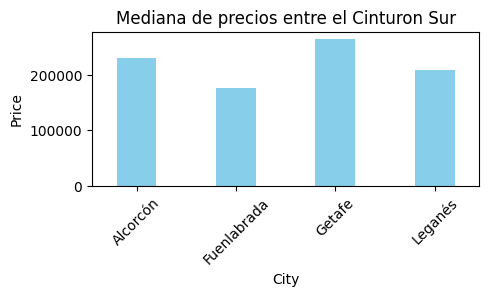

In [24]:
# TODO: Code

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('assets/real_estate.csv', sep=';')

#Cinturon sur
cinturon_sur = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]

#Separar el cinturon sur de el dataframe
subconjunto = df[df['level5'].isin(cinturon_sur)]

#Mediana del subconujunto
mediana_subconjunto = subconjunto.groupby('level5')['price'].mean().round() #.reset_index()
#mediana_subconjunto.columns = ['City','Price']
    
#Grafico de barras
#plt.figure(figsize=(10,5))
#plt.bar(mediana_subconjunto['City'],mediana_subconjunto['Price'],width=(0.3), color='blue', )
mediana_subconjunto.plot(kind='bar', color='skyblue', figsize=(5, 2), width=0.4)
plt.xlabel('City')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.title('Mediana de precios entre el Cinturon Sur')
plt.show()


#TEST
#print(mediana_subconjunto)
#print(type(mediana_subconjunto))



**TODO: Markdown**.  Como podemo ver la mediana de los precios por ciudad nos pueden mostrar 2 cosas muy importantes

1- La diferencia entre precios por cada ciudad, donde vemos que Getafe es la ciudad donde la mediana por precios es mas alta, y la mas baja se la llevaria la ciudad de Fuenlabrada


2- Tambien (aunque es una suposicion) nos muestra la ciudad donde hay mas demanda (porque siguiendo la regla de a mayor precio mayor demanda) nos podriamos dar cuenta que quizas Getafe es una buena opcion de inversion

#### Ejercicio 16. Calcula la media y la varianza de muestra para las siguientes variables: precio, habitaciones, superficie y baños (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprime ambos valores por cada variable.

In [56]:
# TODO
import pandas as pd

df = pd.read_csv('assets/real_estate.csv', sep=';')

#Cinturon sur
cinturon_sur = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]

#Separar el cinturon sur de el dataframe
subconjunto = df[df['level5'].isin(cinturon_sur)]

#calcular la media
media_subconjunto = subconjunto.groupby('level5')[['price','surface','rooms','bathrooms']].median().round()

#calcular le varianza
varianza_subconjunto = subconjunto.groupby('level5')[['price','surface','rooms','bathrooms']].var().round()

#TEST
print('MEDIA DE EL CINTURON SUR')
print(media_subconjunto)
print('-----------------------------------------------------------------')
print('VARIANZA DE EL CINTURON SUR')
print(varianza_subconjunto)

MEDIA DE EL CINTURON SUR
                price  surface  rooms  bathrooms
level5                                          
Alcorcón     179500.0     85.0    3.0        1.0
Fuenlabrada  155000.0     88.0    3.0        1.0
Getafe       285305.0    116.0    3.0        2.0
Leganés      169950.0     80.0    3.0        1.0
-----------------------------------------------------------------
VARIANZA DE EL CINTURON SUR
                    price  surface  rooms  bathrooms
level5                                              
Alcorcón     1.594783e+10   4244.0    1.0        1.0
Fuenlabrada  4.701021e+09   2265.0    0.0        0.0
Getafe       2.098267e+10   5828.0    1.0        1.0
Leganés      1.191394e+10   3987.0    1.0        1.0


#### Ejercicio 17. ¿Cuál es la casa más cara de cada población? Debes usar el subset obtenido en la pregunta 14 (★★☆)

Imprime tanto la dirección como el precio de la casa seleccionada de cada población. Puedes imprimir un DataFrame o una sola línea para cada población.

In [84]:
# TODO
import pandas as pd

df = pd.read_csv('assets/real_estate.csv', sep=';')

#Cinturon sur
cinturon_sur = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]

#Separar el cinturon sur de el dataframe
subconjunto = df[df['level5'].isin(cinturon_sur)]

#casa mas cara de cada poblacion
casa_mas_cara = subconjunto.groupby('level5')[['address','price']].max().reset_index()
casa_mas_cara.columns = ['Ciudad', 'Direccion', 'Precio']

print('Estas son las casa mas caras de cada ciudad, con su direccion y precio especifico\n')
print(casa_mas_cara)

Estas son las casa mas caras de cada ciudad, con su direccion y precio especifico

        Ciudad                                          Direccion   Precio
0     Alcorcón                      Travesia Nuncio del, Alcorcón   950000
1  Fuenlabrada  Urbanización Urbanización Parque Miraflores, 5...   490000
2       Getafe                           San Sebastián, 1, Getafe  1050000
3      Leganés     Plaza Pza España, Gran Oportunidad!!!, Leganés   650000


#### Ejercicio 18. Normaliza la variable de precios para cada población y traza los 4 histogramas en el mismo gráfico (debes usar el subconjunto obtenido en la pregunta 14) (★★★)

Para el método de normalización, puedes usar el que consideres adecuado, no hay una única respuesta correcta para esta pregunta. Imprime el gráfico y escribe en la celda de Markdown un breve análisis sobre el gráfico.

Pista: Puedes ayudarte revisando la demostración multihist de Matplotlib.

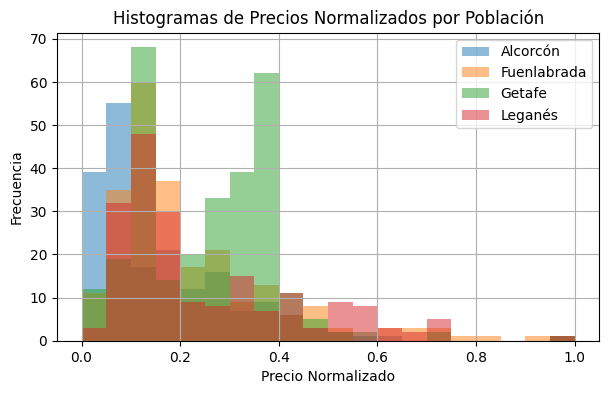

In [25]:
# TODO
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('assets/real_estate.csv', sep=';')

#Cinturon sur
cinturon_sur = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]

#Separar el cinturon sur de el dataframe
subconjunto = df[df['level5'].isin(cinturon_sur)]

#Funcion de normzalicacion
def normalize_minmax(x):
    return (x - x.min()) / (x.max() - x.min())

#casa mas cara de cada poblacion
casa_mas_cara = subconjunto.groupby('level5')['price'].apply(normalize_minmax).reset_index()

#Histogramas
plt.figure(figsize=(7, 4))

for poblacion in casa_mas_cara['level5'].unique():
    subset = casa_mas_cara[casa_mas_cara['level5'] == poblacion]
    plt.hist(subset['price'], bins=20, alpha=0.5, label=poblacion)

plt.xlabel('Precio Normalizado')
plt.ylabel('Frecuencia')
plt.title('Histogramas de Precios Normalizados por Población')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

**TODO: Markdown**.Como podemos ver la mayor parte de los precios se encuentra concentrada entre el 0.0 y el 0.4, lo que significa que la normalizacion no es muy alta. Algo interesante que se puede ver es que la superpocicion de ciudades en los rangos ya mencionados nos demuestra que estas ciudades tienen una fuerte similitud de precios. Cabe acotar, que lo anterior no significa que son un espejo de la otra, debido a que podemos ver que la frecuencia y los valores en ciertas ciudades son mucho superiores/inferiores en comparacion con otras

#### Ejercicio 19. ¿Qué puedes decir sobre el precio por metro cuadrado (precio/m2) entre los municipios de 'Getafe' y 'Alcorcón'? Debes usar el subconjunto obtenido en la pregunta 14 (★★☆)

Pista: Crea una nueva columna llamada `pps` (price per square en inglés) y luego analiza los valores

In [110]:
# TODOimport pandas as pd

df = pd.read_csv('assets/real_estate.csv', sep=';')

#Crear la columna pps
df['pps'] = df['price'] / df['surface']

#separar dos ciudades
dos_ciudades = ["Getafe", "Alcorcón"]

#Separarlas dos ciudades de el dataframe
subconjunto = df[df['level5'].isin(dos_ciudades)]

#Separar ciudades entre ellas
getafe_df = subconjunto[subconjunto['level5'] == 'Getafe']
alcorcon_df = subconjunto[subconjunto['level5'] == 'Alcorcón']

#Precio medio por metro cuadrado
mean_price_getafe = getafe_df['pps'].mean().round()
mean_price_alcorcon = alcorcon_df['pps'].mean().round()

print(f"Precio por metro cuadrado en Getafe: £{mean_price_getafe}")
print(f"Precio por metro cuadrado en Alcorcón: £{mean_price_alcorcon}")



Precio por metro cuadrado en Getafe: £2066.0
Precio por metro cuadrado en Alcorcón: £2239.0


Como podemos ver, los precios por metro cuadrado no son los mismos. En este caso lo que hicimos fue obtener los precios de toda la localidad y le sacamos la mediana para ver cual es el promedio de los precios. Sin embargo, vemos que la diferencia entre precios es menos de £200 lo que significa que las zonas, a nivel de precio, no tienen una gran diferencia entre ellas si solo evaluamos los metros cuadrados

#### Ejercicio 20. Realiza el mismo gráfico para 4 poblaciones diferentes (columna level5) y colócalos en el mismo gráfico. Debes usar el subconjunto obtenido en la pregunta 14 (★★☆) 
Pista: Haz un diagrama de dispersión de cada población usando subgráficos (subplots).

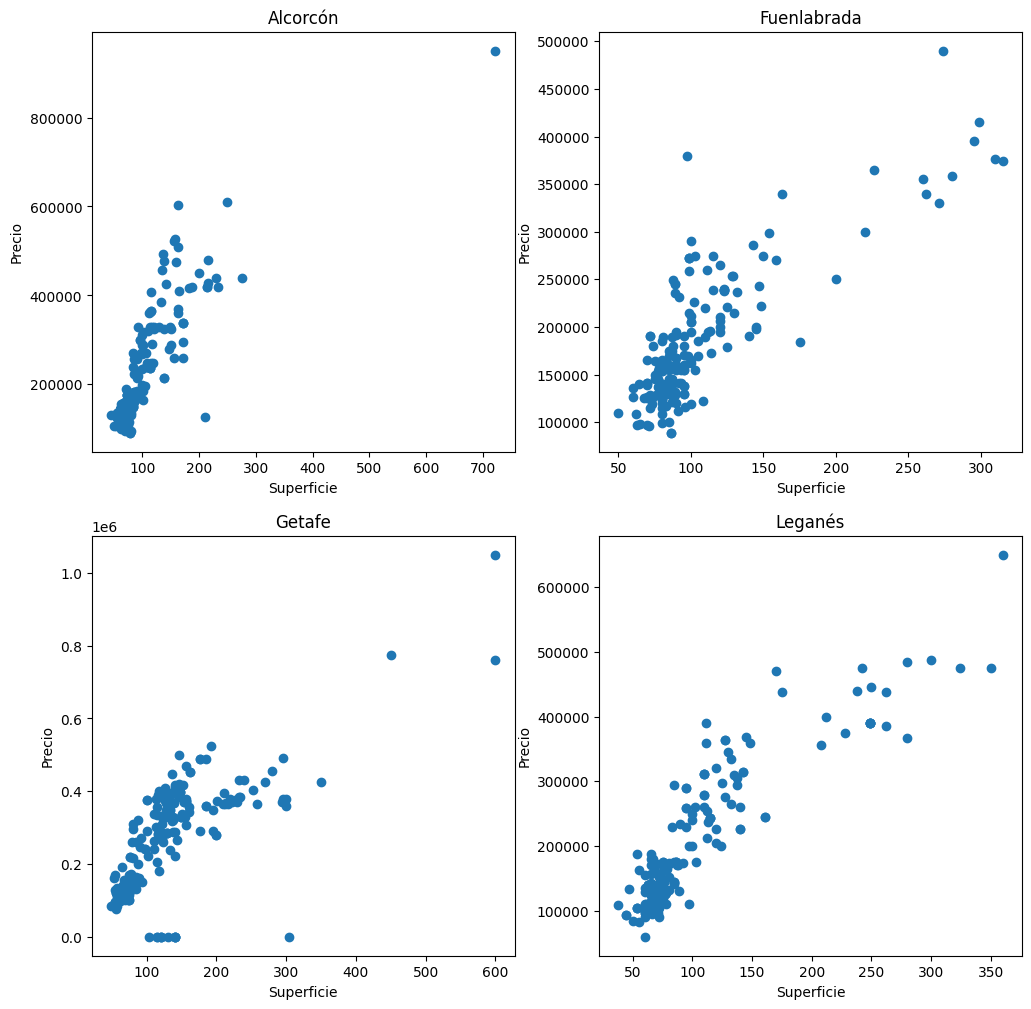

In [2]:
# TODO
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('assets/real_estate.csv', sep=';')

#Cinturon sur
cinturon_sur = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]

#Subconjunto
subconjunto = df[df['level5'].isin(cinturon_sur)]

#Ciudades
agrupar = subconjunto.groupby('level5')

# Poner en el mismo grafico
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
axs = axs.flatten()

# Diagrama de dispersion
for i, (ciudad, group) in enumerate(agrupar):
    axs[i].scatter(group['surface'], group['price'])
    axs[i].set_title(ciudad)
    axs[i].set_xlabel('Superficie')
    axs[i].set_ylabel('Precio')

plt.show()



#### Ejercicio 21. Realiza un trazado de las coordenadas (columnas latitud y longitud) del cinturón sur de Madrid por color de cada población (debes usar el subconjunto obtenido del Ejercicio 14) (★★★★)

Ejecuta la siguiente celda y luego comienza a codear en la siguiente. Debes implementar un código simple que transforme las columnas de coordenadas en un diccionario de Python (agrega más información si es necesario) y agrégala al mapa.

In [3]:
from ipyleaflet import Map, basemaps

# Mapa centrado en (60 grados latitud y -2.2 grados longitud)
# Latitud, longitud
map = Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.Stamen.Terrain)
map

AttributeError: Stamen

In [ ]:
## Aquí: traza la coordenadas de los estados

## PON TU CÓDIGO AQUÍ:
import pandas as pd
from ipyleaflet import Map, Marker, basemaps, Icon

df = pd.read_csv('assets/real_estate.csv', sep=';')
coordenadas = {}
#Cinturon sur
cinturon_sur = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]

#Subconjunto
subconjunto = df[df['level5'].isin(cinturon_sur)][['level5','latitude','longitude']]
subconjunto.columns = ['Ciudad', 'Latitud', 'Longitud']

#Mapa de coordenadas
for index, row in subconjunto.iterrows():
    poblacion = row['Ciudad']
    lat_lon = (row['Latitud'], row['Longitud'])
    
    if poblacion not in coordenadas:
        coordenadas[poblacion] = []
    coordenadas[poblacion].append(lat_lon)

#Mapa centrado en el cinturon sur
m = Map(center=(40.35, -3.7), zoom=10, basemap=basemaps.Stamen.Terrain)

#Color de cada poblacion
colores = {
    "Fuenlabrada": "red",
    "Leganés": "blue",
    "Getafe": "green",
    "Alcorcón": "purple"
}

#Anadir globos a cada zona
for ciudad, coo in coordenadas.items():
    for lat, lon in coo:
        marker = Marker(location=(lat, lon), icon=Icon(icon_color=colores[ciudad]))
        m.add(marker)

m

***LEER***

En este caso tuve que usar el pack de folium, debido a que el ipyleaflet no me funcionaba de la manera correcta. Use distintos mapas con el ipyleaflet donde se me mostraba el mapa pero no los marcadores. Por esa razon, considere buscar otra manera y consegui folium. Y al finalizar de acoplar el codigo a la nueva sintaxis dio los resultados que estaba esperando

In [31]:
import pandas as pd
#En este caso estoy usando folium debido a que no me dejaba usar ".Stamen.Terrain"
import folium

#Leer archivo
df = pd.read_csv('assets/real_estate.csv', sep=';')

#Coordenadas
coordenadas = {}

#Cinturon sur
cinturon_sur = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]

#Subconjunto
subconjunto = df[df['level5'].isin(cinturon_sur)][['level5', 'latitude', 'longitude']]
subconjunto.columns = ['Ciudad', 'Latitud', 'Longitud']

#Remplazar "," por "." 
subconjunto['Latitud'] = subconjunto['Latitud'].str.replace(',', '.').astype(float)
subconjunto['Longitud'] = subconjunto['Longitud'].str.replace(',', '.').astype(float)

#Mapa de coordenadas
for index, row in subconjunto.iterrows():
    poblacion = row['Ciudad']
    lat_lon = (row['Latitud'], row['Longitud'])
    
    if poblacion not in coordenadas:
        coordenadas[poblacion] = []
    coordenadas[poblacion].append(lat_lon)

#Ubicar la visualizacion del mapa solo en el cinturon sur
mapa_de_coordenadas = folium.Map(location=[40.35, -3.7], zoom_start=10)

#Color de cada poblacion
colores = {
    "Fuenlabrada": "red",
    "Leganés": "blue",
    "Getafe": "green",
    "Alcorcón": "purple"
}

#Anadir globos a cada zona
for ciudad, lista_coordenadas in coordenadas.items():
    for i in lista_coordenadas:
        folium.Marker(
            location=i,
            icon=folium.Icon(color=colores[ciudad]),
        ).add_to(mapa_de_coordenadas)

#TEST
mapa_de_coordenadas